<a href="https://colab.research.google.com/github/bingsen-wang/Math/blob/main/EulerIdentity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><b>Euler Identity</h1></b>

Dr. Bingsen Wang

4/20/2025
</center>

#Python Code

0
0
50
100
150
200
250
300
350
400
450
500
550
0


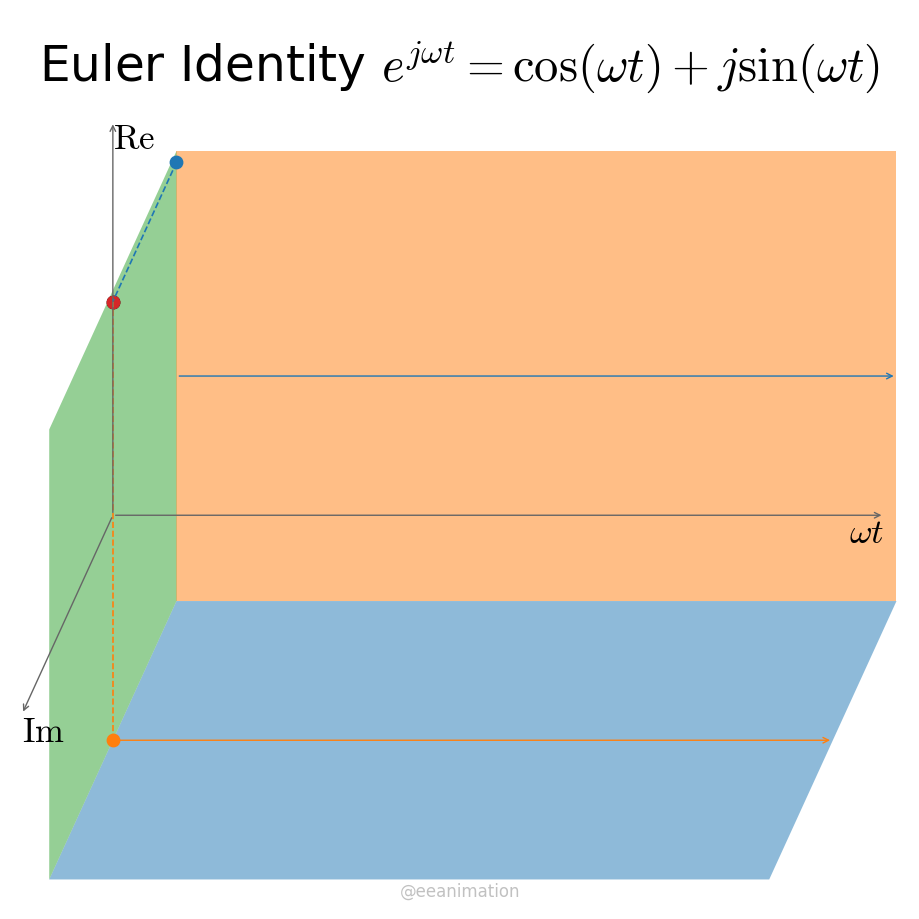

In [69]:
from matplotlib import pyplot,animation,cm,patches,path
import numpy as np
pyplot.rcParams.update({"font.family":"sans-serif", "mathtext.fontset":"cm"})
def d32(xyz):
  return np.array([xyz[2]-xyz[1]*np.sin(np.pi/4)/2,xyz[0]-xyz[1]*np.cos(np.pi/4)/2])

Nf=600
r=.38
xm,ym,zm=0.4,.7,2.8
wt=2*np.pi*np.linspace(0,6,Nf)
x=r*np.cos(wt)
y=r*np.sin(wt)
z=wt/max(wt)*zm
lxyz=d32([x,y,z])
lxz=d32([x,y*0-ym,z])
lyz=d32([x*0-xm,y,z])
lxy=d32([x,y,z*0])
cl = list(cm.tab10.colors) #colors of lines
fig = pyplot.figure(figsize=([9,9]))
xlim=[-.4,3.1];ylim=[-.7,.9]
ax = fig.add_axes([0,0,1,1],xlim=xlim,ylim=ylim,fc='none'); ax.axis('off')
ax.text(np.sum(xlim)/2,ylim[1]-.1, r'Euler Identity $e^{j\omega t}=\cos(\omega t)+j\sin(\omega t)$', size=35,ha='center',va='center')
p1=[d32((.7,0,0)),d32((0,1,0)),d32((0,0,3))]
[ax.annotate('',p1[k],(0,0),arrowprops=dict(arrowstyle='->',lw=1,color='.4')) for k in range(3)] #x,y,z-axis
[ax.text(p1[k][0],p1[k][1],[r'$\text{Re}$',r'$\text{Im}$',r'$\omega t$'][k],
         size=25,va=['top','top','top'][k],ha=['left','left','right'][k]) for k in range(3)]

lines = [ax.plot([],[],c='.2',lw=3,alpha=.5)[0] ]
lines += [ax.plot([],[],c=cl[k],lw=2,alpha=1)[0] for k in range(2)]
lines += [ax.plot([],[],c=cl[3],lw=2,alpha=1)[0]]
lines += [ax.plot([],[],'--',c=cl[k],lw=1.2,alpha=1)[0] for k in range(2)]
lines += [ax.plot([],[],'--',c=cl[3],lw=1.2,alpha=1)[0]]
dots=[ax.scatter(0,0,s=80,marker='o',color=['k',cl[0],cl[1],cl[3]][k]) for k in range(4)]
verts1=[d32([-xm,-ym,zm]),d32([-xm,ym,zm]),d32([-xm,ym,0]),d32([-xm,-ym,0])]+[(0,0)] #y-z plane at x=-ym
verts2=[d32([xm,-ym,zm]),d32([-xm,-ym,zm]),d32([-xm,-ym,0]),d32([xm,-ym,0])]+[(0,0)] #x-z plane at y=-ym
verts3=[d32([xm,ym,0]),d32([-xm,ym,0]),d32([-xm,-ym,0]),d32([xm,-ym,0])]+[(0,0)] #x-y plane at z=0
codes=[path.Path.MOVETO]+[path.Path.LINETO]*3 + [path.Path.CLOSEPOLY]
[ax.add_patch(patches.PathPatch(path.Path([verts1,verts2,verts3][k],codes),ec='none',fc=cl[k],lw=2,joinstyle='round',alpha=.5,zorder=-3))for k in range(3)]

ax.annotate('',d32([0,-ym,zm]),d32([0,-ym,0]),arrowprops=dict(arrowstyle='->',lw=1,color=cl[0])) #z-axis at y=-ym
ax.annotate('',d32([-xm,0,zm]),d32([-xm,0,0]),arrowprops=dict(arrowstyle='->',lw=1,color=cl[1])) #z-axis at x=-xm
def animate(i):
  # i=100
  if i%50==0:    print(i)
  lines[0].set_data(lxyz[0,:i+1],lxyz[1,:i+1])
  dots[0].set_offsets(lxyz[:,i])
  lines[1].set_data(lxz[0,:i+1],lxz[1,:i+1]) #xz at y=-ym
  dots[1].set_offsets(lxz[:,i])
  lines[2].set_data(lyz[0,:i+1],lyz[1,:i+1]) #yz zt x=-xm
  dots[2].set_offsets(lyz[:,i])
  lines[3].set_data(lxy[0,:i+1],lxy[1,:i+1]) #xy at z=0
  dots[3].set_offsets(lxy[:,i])
  lines[4].set_data([lxz[0,i],lxyz[0,i]],[lxz[1,i],lxyz[1,i]]) #dotted line xyz to xz
  lines[5].set_data([lyz[0,i],lxyz[0,i]],[lyz[1,i],lxyz[1,i]]) #dotted line xyz to yz
  lines[6].set_data([lxy[0,i],lxyz[0,i]],[lxy[1,i],lxyz[1,i]]) #dotted line xyz to xy
  return

ax.text(np.average(ax.get_xlim()),ax.get_ylim()[0]*.99+ax.get_ylim()[1]*.01,r'@eeanimation',size=12,c='.2',alpha=.3,ha='center',va='bottom')
anim = animation.FuncAnimation(fig, animate, frames=Nf, interval=20)
anim.save("Euler_Identity.mp4",writer=animation.FFMpegWriter(fps=60),dpi=200)